<a href="https://colab.research.google.com/github/won195/TIL/blob/master/2_2_%5B4_4_%EB%8B%A8%EC%96%B4_%EB%B2%A1%ED%84%B0_%EB%A7%8C%EB%93%A4%EA%B8%B0%5D_%E1%84%8B%E1%85%A8%E1%84%8C%E1%85%A6_%E1%84%8F%E1%85%A9%E1%84%91%E1%85%A5%E1%84%89%E1%85%B3%E1%84%8B%E1%85%A6_TF_IDF_%E1%84%80%E1%85%A1%E1%84%8C%E1%85%AE%E1%86%BC%E1%84%8E%E1%85%B5_%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%92%E1%85%A1%E1%84%80%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) #폰트설정

In [4]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family

In [5]:
corpus = ["코로나 거리두기와 코로나 상생지원금 문의입니다.",
          "지하철 운행시간과 지하철 요금 문의입니다.",
          "지하철 승강장 문의입니다.",
          "코로나 선별진료소 문의입니다.",
          "버스 운행시간 문의입니다.",
          "버스 터미널 위치 안내입니다.",
          "코로나 거리두기 안내입니다.",
          "택시 승강장 문의입니다."
          ]

In [6]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cvect = CountVectorizer()
cvect.fit(corpus)
dtm = cvect.transform(corpus)
dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [10]:
 dtm = cvect.fit_transform(corpus)
 dtm

<8x16 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [17]:
vocab = cvect.get_feature_names_out()
vocab

array(['거리두기', '거리두기와', '문의입니다', '버스', '상생지원금', '선별진료소', '승강장', '안내입니다',
       '요금', '운행시간', '운행시간과', '위치', '지하철', '코로나', '택시', '터미널'],
      dtype=object)

In [14]:
cvect.vocabulary_

{'코로나': 13,
 '거리두기와': 1,
 '상생지원금': 4,
 '문의입니다': 2,
 '지하철': 12,
 '운행시간과': 10,
 '요금': 8,
 '승강장': 6,
 '선별진료소': 5,
 '버스': 3,
 '운행시간': 9,
 '터미널': 15,
 '위치': 11,
 '안내입니다': 7,
 '거리두기': 0,
 '택시': 14}

In [24]:
df_dtm = pd.DataFrame(dtm.toarray(), columns=vocab)
df_dtm

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
6,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
7,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [28]:
df_dtm.sum().to_frame().T

,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,1,1,6,2,1,1,2,2,1,1,1,1,3,4,1,1


In [29]:
corpus

['코로나 거리두기와 코로나 상생지원금 문의입니다.',
 '지하철 운행시간과 지하철 요금 문의입니다.',
 '지하철 승강장 문의입니다.',
 '코로나 선별진료소 문의입니다.',
 '버스 운행시간 문의입니다.',
 '버스 터미널 위치 안내입니다.',
 '코로나 거리두기 안내입니다.',
 '택시 승강장 문의입니다.']

In [35]:
cvect = CountVectorizer(ngram_range=(1, 2))
dtm = cvect.fit_transform(corpus)
dtm

<8x36 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [45]:
vocab = cvect.get_feature_names_out()
df_dtm = pd.DataFrame(dtm.toarray(), columns=cvect.get_feature_names_out())
print(vocab)

print("단어 수 :",len(vocab))
display(df_dtm.style.background_gradient())
df_dtm.sum().to_frame().T

['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '문의입니다' '버스' '버스 운행시간' '버스 터미널'
 '상생지원금' '상생지원금 문의입니다' '선별진료소' '선별진료소 문의입니다' '승강장' '승강장 문의입니다' '안내입니다'
 '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다' '운행시간과' '운행시간과 지하철' '위치' '위치 안내입니다'
 '지하철' '지하철 승강장' '지하철 요금' '지하철 운행시간과' '코로나' '코로나 거리두기' '코로나 거리두기와'
 '코로나 상생지원금' '코로나 선별진료소' '택시' '택시 승강장' '터미널' '터미널 위치']
단어 수 : 36


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,...,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,1,1,1,1,6,2,1,1,1,1,...,1,4,1,1,1,1,1,1,1,1


In [46]:
def display_transform_dtm(cvect, corpus):
  dtm = cvect.fit_transform(corpus)
  vocab = cvect.get_feature_names_out()
  df_dtm = pd.DataFrame(dtm.toarray(), columns=cvect.get_feature_names_out())
  print("단어 수 :",len(vocab))
  print(vocab)
  display(df_dtm.style.background_gradient())

In [47]:
display_transform_dtm(cvect, corpus)

단어 수 : 36
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '문의입니다' '버스' '버스 운행시간' '버스 터미널'
 '상생지원금' '상생지원금 문의입니다' '선별진료소' '선별진료소 문의입니다' '승강장' '승강장 문의입니다' '안내입니다'
 '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다' '운행시간과' '운행시간과 지하철' '위치' '위치 안내입니다'
 '지하철' '지하철 승강장' '지하철 요금' '지하철 운행시간과' '코로나' '코로나 거리두기' '코로나 거리두기와'
 '코로나 상생지원금' '코로나 선별진료소' '택시' '택시 승강장' '터미널' '터미널 위치']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [48]:
cvect = CountVectorizer(ngram_range=(2,3))
display_transform_dtm(cvect, corpus)

단어 수 : 33
['거리두기 안내입니다' '거리두기와 코로나' '거리두기와 코로나 상생지원금' '버스 운행시간' '버스 운행시간 문의입니다'
 '버스 터미널' '버스 터미널 위치' '상생지원금 문의입니다' '선별진료소 문의입니다' '승강장 문의입니다' '요금 문의입니다'
 '운행시간 문의입니다' '운행시간과 지하철' '운행시간과 지하철 요금' '위치 안내입니다' '지하철 승강장'
 '지하철 승강장 문의입니다' '지하철 요금' '지하철 요금 문의입니다' '지하철 운행시간과' '지하철 운행시간과 지하철'
 '코로나 거리두기' '코로나 거리두기 안내입니다' '코로나 거리두기와' '코로나 거리두기와 코로나' '코로나 상생지원금'
 '코로나 상생지원금 문의입니다' '코로나 선별진료소' '코로나 선별진료소 문의입니다' '택시 승강장' '택시 승강장 문의입니다'
 '터미널 위치' '터미널 위치 안내입니다']


,거리두기 안내입니다,거리두기와 코로나,거리두기와 코로나 상생지원금,버스 운행시간,버스 운행시간 문의입니다,버스 터미널,버스 터미널 위치,상생지원금 문의입니다,선별진료소 문의입니다,승강장 문의입니다,요금 문의입니다,운행시간 문의입니다,운행시간과 지하철,운행시간과 지하철 요금,위치 안내입니다,지하철 승강장,지하철 승강장 문의입니다,지하철 요금,지하철 요금 문의입니다,지하철 운행시간과,지하철 운행시간과 지하철,코로나 거리두기,코로나 거리두기 안내입니다,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,코로나 선별진료소,코로나 선별진료소 문의입니다,택시 승강장,택시 승강장 문의입니다,터미널 위치,터미널 위치 안내입니다
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [50]:
cvect = CountVectorizer(ngram_range=(1,3), min_df=1)
display_transform_dtm(cvect, corpus)

단어 수 : 49
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '거리두기와 코로나 상생지원금' '문의입니다' '버스'
 '버스 운행시간' '버스 운행시간 문의입니다' '버스 터미널' '버스 터미널 위치' '상생지원금' '상생지원금 문의입니다'
 '선별진료소' '선별진료소 문의입니다' '승강장' '승강장 문의입니다' '안내입니다' '요금' '요금 문의입니다' '운행시간'
 '운행시간 문의입니다' '운행시간과' '운행시간과 지하철' '운행시간과 지하철 요금' '위치' '위치 안내입니다' '지하철'
 '지하철 승강장' '지하철 승강장 문의입니다' '지하철 요금' '지하철 요금 문의입니다' '지하철 운행시간과'
 '지하철 운행시간과 지하철' '코로나' '코로나 거리두기' '코로나 거리두기 안내입니다' '코로나 거리두기와'
 '코로나 거리두기와 코로나' '코로나 상생지원금' '코로나 상생지원금 문의입니다' '코로나 선별진료소'
 '코로나 선별진료소 문의입니다' '택시' '택시 승강장' '택시 승강장 문의입니다' '터미널' '터미널 위치'
 '터미널 위치 안내입니다']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,거리두기와 코로나 상생지원금,문의입니다,버스,버스 운행시간,버스 운행시간 문의입니다,버스 터미널,버스 터미널 위치,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,운행시간과 지하철 요금,위치,위치 안내입니다,지하철,지하철 승강장,지하철 승강장 문의입니다,지하철 요금,지하철 요금 문의입니다,지하철 운행시간과,지하철 운행시간과 지하철,코로나,코로나 거리두기,코로나 거리두기 안내입니다,코로나 거리두기와,코로나 거리두기와 코로나,코로나 상생지원금,코로나 상생지원금 문의입니다,코로나 선별진료소,코로나 선별진료소 문의입니다,택시,택시 승강장,택시 승강장 문의입니다,터미널,터미널 위치,터미널 위치 안내입니다
0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,2,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0


In [51]:
cvect = CountVectorizer(ngram_range=(1,3), min_df=0.2, max_df=5)
display_transform_dtm(cvect, corpus)

단어 수 : 6
['버스' '승강장' '승강장 문의입니다' '안내입니다' '지하철' '코로나']


,버스,승강장,승강장 문의입니다,안내입니다,지하철,코로나
0,0,0,0,0,0,2
1,0,0,0,0,2,0
2,0,1,1,0,1,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,1,0,0,1,0,0
6,0,0,0,1,0,1
7,0,1,1,0,0,0


In [56]:
cvect = CountVectorizer(ngram_range=(1,3), min_df=1, max_df=1.0, max_features=10)
display_transform_dtm(cvect, corpus)

단어 수 : 10
['문의입니다' '버스' '승강장' '승강장 문의입니다' '안내입니다' '지하철' '지하철 승강장 문의입니다' '지하철 요금'
 '지하철 요금 문의입니다' '코로나']


,문의입니다,버스,승강장,승강장 문의입니다,안내입니다,지하철,지하철 승강장 문의입니다,지하철 요금,지하철 요금 문의입니다,코로나
0,1,0,0,0,0,0,0,0,0,2
1,1,0,0,0,0,2,0,1,1,0
2,1,0,1,1,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,1
7,1,0,1,1,0,0,0,0,0,0


In [59]:
stop_words=["코로나","문의입니다"]

cvect = CountVectorizer(ngram_range=(1,3), min_df=1, max_df=1.0, max_features=10, stop_words=stop_words)
display_transform_dtm(cvect, corpus)

단어 수 : 10
['거리두기' '버스' '승강장' '안내입니다' '지하철' '지하철 운행시간과' '지하철 운행시간과 지하철' '택시' '택시 승강장'
 '터미널']


,거리두기,버스,승강장,안내입니다,지하철,지하철 운행시간과,지하철 운행시간과 지하철,택시,택시 승강장,터미널
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,1,1,0,0,0
2,0,0,1,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,1,0,0,0,0,0,1
6,1,0,0,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0,1,1,0


In [62]:
cvect = CountVectorizer(analyzer='char_wb',
                        ngram_range=(1,5),
                        min_df=2, max_df=1.0,
                        max_features=100,
                        stop_words=stop_words)
display_transform_dtm(cvect, corpus)

단어 수 : 100
[' ' ' 거' ' 거리' ' 거리두' ' 거리두기' ' 문' ' 문의' ' 문의입' ' 문의입니' ' 버' ' 버스' ' 버스 '
 ' 승' ' 승강' ' 승강장' ' 승강장 ' ' 안' ' 안내' ' 안내입' ' 안내입니' ' 운' ' 운행' ' 운행시'
 ' 운행시간' ' 지' ' 지하' ' 지하철' ' 지하철 ' ' 코' ' 코로' ' 코로나' ' 코로나 ' '.' '. ' '간'
 '강' '강장' '나' '나 ' '니' '니다' '니다.' '니다. ' '다' '다.' '다. ' '두' '로' '로나' '로나 '
 '문' '문의' '문의입' '문의입니' '문의입니다' '버' '버스' '스' '스 ' '승' '승강' '승강장' '승강장 ' '시'
 '시간' '안' '안내' '안내입' '안내입니' '안내입니다' '운' '운행' '운행시' '운행시간' '의' '의입' '의입니'
 '의입니다' '의입니다.' '입' '입니' '입니다' '입니다.' '입니다. ' '장' '장 ' '지' '지하' '지하철'
 '지하철 ' '철' '철 ' '코' '코로' '코로나' '코로나 ' '하' '하철' '하철 ' '행']


,,거,거리,거리두,거리두기,문,문의,문의입,문의입니,버,버스,버스,승,승강,승강장,승강장,안,안내,안내입,안내입니,운,운행,운행시,운행시간,지,지하,지하철,지하철,코,코로,코로나,코로나,.,.,간,강,강장,나,나,니,니다,니다.,니다.,다,다.,다.,두,로,로나,로나,문,문의,문의입,문의입니,문의입니다,버,버스,스,스,승,승강,승강장,승강장,시,시간,안,안내,안내입,안내입니,안내입니다,운,운행,운행시,운행시간,의,의입,의입니,의입니다,의입니다.,입,입니,입니다,입니다.,입니다.,장,장,지,지하,지하철,지하철,철,철,코,코로,코로나,코로나,하,하철,하철,행
0,10,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,1,1,0,0,0,2,2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,2,2,2,2,0,0,0,0
1,10,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,2,2,2,2,2,2,0,0,0,0,2,2,2,1
2,6,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,0
3,6,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0
4,6,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,8,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0
7,6,0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer()
tfidfvect.fit(corpus)
dtm = tfidfvect.transform(corpus)
dtm

<8x16 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [65]:
dtm = tfidfvect.fit_transform(corpus)
dtm

<8x16 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [66]:
dtm.toarray()

array([[0.        , 0.47991911, 0.23982075, 0.        , 0.47991911,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.69414789, 0.        ,
        0.        ],
       [0.        , 0.        , 0.22216587, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.44458893, 0.        ,
        0.44458893, 0.        , 0.74520044, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.38849954, 0.        , 0.        ,
        0.        , 0.65156278, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.65156278, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.37531751, 0.        , 0.        ,
        0.7510695 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.5431679 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.35765909, 0.59983945, 0.        ,
        0.        , 0.        , 

In [67]:
display_transform_dtm(tfidfvect, corpus)

단어 수 : 16
['거리두기' '거리두기와' '문의입니다' '버스' '상생지원금' '선별진료소' '승강장' '안내입니다' '요금' '운행시간'
 '운행시간과' '위치' '지하철' '코로나' '택시' '터미널']


,거리두기,거리두기와,문의입니다,버스,상생지원금,선별진료소,승강장,안내입니다,요금,운행시간,운행시간과,위치,지하철,코로나,택시,터미널
0,0.000000,0.479919,0.239821,0.000000,0.479919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.694148,0.000000,0.000000
1,0.000000,0.000000,0.222166,0.000000,0.000000,0.000000,0.000000,0.000000,0.444589,0.000000,0.444589,0.000000,0.745200,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.388500,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000,0.000000,0.000000,0.651563,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.375318,0.000000,0.000000,0.751070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.543168,0.000000,0.000000
4,0.000000,0.000000,0.357659,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.454195,0.000000,0.000000,0.000000,0.541948,0.000000,0.000000,0.000000,0.541948
6,0.670344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.561801,0.000000,0.000000,0.000000,0.000000,0.000000,0.484788,0.000000,0.000000
7,0.000000,0.000000,0.357659,0.000000,0.000000,0.000000,0.599839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.715732,0.000000


In [68]:
idf = tfidfvect.idf_
idf

array([2.5040774 , 2.5040774 , 1.25131443, 2.09861229, 2.5040774 ,
       2.5040774 , 2.09861229, 2.09861229, 2.5040774 , 2.5040774 ,
       2.5040774 , 2.5040774 , 2.09861229, 1.81093022, 2.5040774 ,
       2.5040774 ])

In [73]:
vocab = tfidfvect.get_feature_names_out()
idf_dict = dict(zip(vocab, idf))
idf_dict

{'거리두기': 2.504077396776274,
 '거리두기와': 2.504077396776274,
 '문의입니다': 1.251314428280906,
 '버스': 2.09861228866811,
 '상생지원금': 2.504077396776274,
 '선별진료소': 2.504077396776274,
 '승강장': 2.09861228866811,
 '안내입니다': 2.09861228866811,
 '요금': 2.504077396776274,
 '운행시간': 2.504077396776274,
 '운행시간과': 2.504077396776274,
 '위치': 2.504077396776274,
 '지하철': 2.09861228866811,
 '코로나': 1.8109302162163288,
 '택시': 2.504077396776274,
 '터미널': 2.504077396776274}

<Axes: >

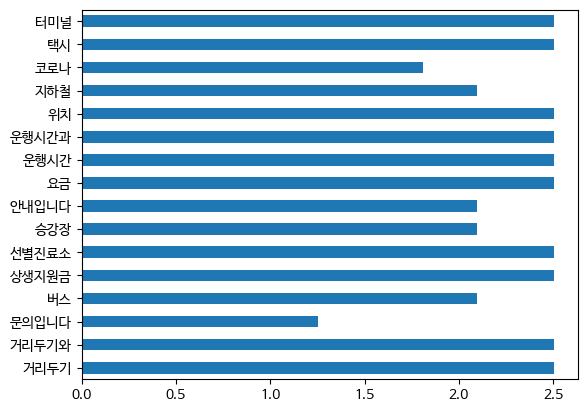

In [74]:
pd.Series(idf_dict).plot.barh()

In [86]:
tfidfvect = TfidfVectorizer(analyzer="word", ngram_range=(1, 2), max_df=1.0, min_df=1)
# tfidfvect.fit_transform(corpus)
display_transform_dtm(tfidfvect, corpus)

단어 수 : 36
['거리두기' '거리두기 안내입니다' '거리두기와' '거리두기와 코로나' '문의입니다' '버스' '버스 운행시간' '버스 터미널'
 '상생지원금' '상생지원금 문의입니다' '선별진료소' '선별진료소 문의입니다' '승강장' '승강장 문의입니다' '안내입니다'
 '요금' '요금 문의입니다' '운행시간' '운행시간 문의입니다' '운행시간과' '운행시간과 지하철' '위치' '위치 안내입니다'
 '지하철' '지하철 승강장' '지하철 요금' '지하철 운행시간과' '코로나' '코로나 거리두기' '코로나 거리두기와'
 '코로나 상생지원금' '코로나 선별진료소' '택시' '택시 승강장' '터미널' '터미널 위치']


,거리두기,거리두기 안내입니다,거리두기와,거리두기와 코로나,문의입니다,버스,버스 운행시간,버스 터미널,상생지원금,상생지원금 문의입니다,선별진료소,선별진료소 문의입니다,승강장,승강장 문의입니다,안내입니다,요금,요금 문의입니다,운행시간,운행시간 문의입니다,운행시간과,운행시간과 지하철,위치,위치 안내입니다,지하철,지하철 승강장,지하철 요금,지하철 운행시간과,코로나,코로나 거리두기,코로나 거리두기와,코로나 상생지원금,코로나 선별진료소,택시,택시 승강장,터미널,터미널 위치
0,0.000000,0.000000,0.346236,0.346236,0.173018,0.000000,0.000000,0.000000,0.346236,0.346236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500790,0.000000,0.346236,0.346236,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.166025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332242,0.332242,0.000000,0.000000,0.332242,0.332242,0.000000,0.000000,0.556890,0.000000,0.332242,0.332242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.272743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.457425,0.457425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.457425,0.545802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.257271,0.000000,0.000000,0.000000,0.000000,0.000000,0.514841,0.514841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.372329,0.000000,0.000000,0.000000,0.514841,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.251365,0.421572,0.503022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.503022,0.503022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.331157,0.000000,0.395138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.331157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.395138,0.395138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.395138,0.395138
6,0.486482,0.486482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.351820,0.486482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.261401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.438402,0.438402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.523104,0.523104,0.000000,0.000000
